In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../CV/'
edge = '../CV/edgeList/'

if not os.path.exists(ruta):
    os.makedirs(ruta)
    
if not os.path.exists(edge):
    os.makedirs(edge)

In [20]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    
    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [6]:
cv = pd.read_csv('../transients/CV.csv')
cv


,Classification,ID,observation_id,Mag,Magerr,MJD
0,CV,1006010010864157554,309104,18.5252,0.148693,54600.339487
1,CV,1006010010864157554,309106,18.5661,0.152442,54600.352538
2,CV,1006010010864157554,309107,18.3649,0.139258,54937.398087
3,CV,1006010010864157554,309108,18.2922,0.135098,54937.402902
4,CV,1006010010864157554,309109,18.3094,0.137790,54937.407789
...,...,...,...,...,...,...
47462,CV,1110061320094139400,33801,18.2165,0.122443,55618.098361
47463,CV,1110061320094139400,33784,18.4069,0.129043,55540.165107
47464,CV,1110061320094139400,33783,18.4379,0.132841,55540.162850
47465,CV,1110061320094139400,33782,18.7141,0.146389,55540.158320


In [10]:
ids = list(cv['ID'].unique())
print(len(list(cv['ID'].unique())))
cv['ID'].unique()

130


array([1006010010864157554, 1005311150714116242, 1005201181164141253,
       1005221320424122472,  910191071174104173, 1005240041134109468,
       1005190041194148620,  806111011244115704, 1011081230504119481,
       1010091290054106863,  909221290444111464,  812311430294141229,
        909231150844135447, 1009161290084131880, 1401011150654104472,
       1006241041184114393, 1006101261134132083,  909301120444140061,
       1006091120874119140, 1206171090824101743, 1206130011154131139,
       1111161070254130896,  711081290154130838,  909281260174155619,
       1006151091174130008,  805051090884151996, 1002021180433134193,
       1002171210554127510,  810301010244104094, 1003251350714125894,
        811181230214118218, 1003211090274101591,  909281091224142365,
       1012031380394141353, 1001081010294129406,  812011090264120935,
        811071180194106816, 1003131090504109287,  810280041154254954,
       1002191010224113664,  912201320034112505, 1011281090284102188,
       1012031380384

##### Función para hacer los datos

In [8]:
#funcion que haga eso de forma automatica

def edgelist(id):
    vec_id = cv[cv['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')


#### Indices de los id's a probar (sacado aleatoreamente)

id1: 77

id2: 84

id3: 11

id4: 96

id5: 29

In [14]:
ids_group =  [902191010254145868, 711151400724125465, 911190011164102559, 901181040484106855, 1007051120874117074, 
              1411171260164123577, 902221430424130546, 1506191041214138198, 810280041154254954, 1110191350734141576, 
              904181120584134509, 1211121320074127003, 909281260174155619, 1102081010474158290, 811071180194106816]

""" id1 = 804271320724132848
id2 = 909171181144114493
id3 = 812311430294141229
id4 = 904011350464101119
id5 = 1003251350714125894


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5) """


#TODO: Realizar las pruebas de la 2 en adelante

' id1 = 804271320724132848\nid2 = 909171181144114493\nid3 = 812311430294141229\nid4 = 904011350464101119\nid5 = 1003251350714125894\n\n\nedgelist(id1)\nedgelist(id2)\nedgelist(id3)\nedgelist(id4)\nedgelist(id5) '

In [8]:
values_min = [0.77, 0.84, 0.77, 0.62, 0.79, 0.765, 0.84, 0.67, 0.76, 0.785, 0.70, 0.77, 0.78, 0.79, 0.80]
values_max = [1.41, 1.55, 1.35, 1.39, 1.44, 1.390, 1.37, 1.42, 1.42, 1.335, 1.48, 1.42, 1.44, 1.42, 1.34]
values_alpha = [2.39, 1.93, 2.84, 2.4, 2.29, 2.57, 2.67, 2.25, 2.43, 2.9, 2.19, 2.42, 2.41, 2.4, 2.7]

In [26]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [27]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.763, 1.412, 'CV')) 

print(values)

[['CV', 1006010010864157554, 2.48], ['CV', 1005311150714116242, 2.46], ['CV', 1005201181164141253, 2.39], ['CV', 1005221320424122472, 2.59], ['CV', 910191071174104173, 2.58], ['CV', 1005240041134109468, 2.55], ['CV', 1005190041194148620, 2.28], ['CV', 806111011244115704, 2.13], ['CV', 1011081230504119481, 2.65], ['CV', 1010091290054106863, 2.27], ['CV', 909221290444111464, 2.63], ['CV', 812311430294141229, 2.87], ['CV', 909231150844135447, 2.45], ['CV', 1009161290084131880, 2.3], ['CV', 1401011150654104472, 2.57], ['CV', 1006241041184114393, 2.48], ['CV', 1006101261134132083, 2.27], ['CV', 909301120444140061, 2.59], ['CV', 1006091120874119140, 2.44], ['CV', 1206171090824101743, 2.51], ['CV', 1206130011154131139, 2.22], ['CV', 1111161070254130896, 2.39], ['CV', 711081290154130838, 2.48], ['CV', 909281260174155619, 2.4], ['CV', 1006151091174130008, 2.04], ['CV', 805051090884151996, 2.19], ['CV', 1002021180433134193, 2.14], ['CV', 1002171210554127510, 2.57], ['CV', 810301010244104094, 2.4

In [28]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

2.7


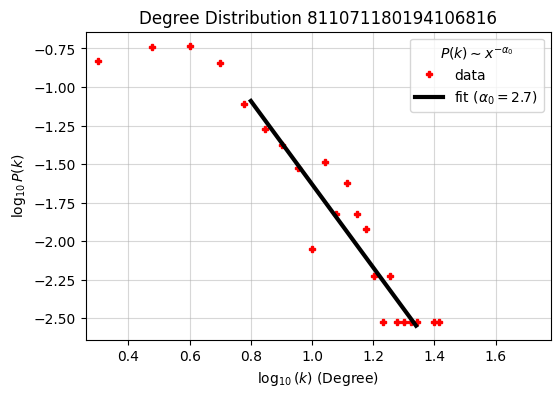

In [21]:
get_alpha(ruta, ids_group[14], 0.8, 1.34, 0.26,1.78, "red", ids_group[14])

#### PRUEBA 1 $\rightarrow$ CV

ID: 804271320724132848

In [10]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id1, 0.76 ,1.45,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ CV

ID: 909171181144114493

In [11]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id2, 0.76 ,1.44,0.26,1.78, "red", id2)


#### PRUEBA 3 $\rightarrow$ CV

ID: 812311430294141229

In [12]:

# get_alpha(ruta, id3, 0.886 ,1.275,0.26,1.78, "red", id3)


In [13]:

# get_alpha(ruta, id3, 0.89 ,1.275,0.26,1.78, "red", id3)


#### PRUEBA 4 $\rightarrow$ CV

ID: 904011350464101119

In [14]:

# get_alpha(ruta, id4, 0.78 ,1.48,0.26,1.78, "red", id4)


#### PRUEBA 5 $\rightarrow$ CV

ID: 1003251350714125894

In [15]:

# get_alpha(ruta, id5, 0.76 ,1.45,0.26,1.78, "red", id5)
